In [1]:
import yfinance as yf 
import pandas as pd
import numpy as np
from scipy.optimize import minimize, Bounds
import matplotlib.pyplot as plt

### Setting up data 

In [3]:
Ast = yf.download(['PG', 'DIS', 'IBM', 'NKE', 'BA', 'KO', 'CVX'], interval="1d", start="2017-12-01", end="2023-09-30")

Ast.head()

[*********************100%%**********************]  7 of 7 completed


Price        Adj Close                                                \
Ticker              BA        CVX         DIS         IBM         KO   
Date                                                                   
2017-12-01  258.623230  89.439392  100.744698  107.885925  37.164661   
2017-12-04  264.903412  90.434746  105.501945  109.071045  37.374855   
2017-12-05  262.587646  90.097977  102.630356  108.297264  37.399113   
2017-12-06  265.189362  89.514229  100.945694  107.425842  37.552723   
2017-12-07  268.715363  89.529190  100.754265  107.056396  37.011047   

Price                                  Close                          ...  \
Ticker            NKE         PG          BA         CVX         DIS  ...   
Date                                                                  ...   
2017-12-01  55.598206  75.038918  271.380005  119.510002  105.250000  ...   
2017-12-04  55.802464  75.910881  277.970001  120.839996  110.220001  ...   
2017-12-05  56.099586  75.902573  275.540009  120.389999  107.220001  ...   
2017-12-06  55.449638  75.778023  278.269989  119.610001  105.459999  ...   
2017-12-07  56.266724  74.822998  281.970001  119.629997  105.260002  ...   

Price            Open                         Volume                     \
Ticker             KO        NKE         PG       BA      CVX       DIS   
Date                                                                      
2017-12-01  45.799999  60.419998  90.180000  4592500  6831800   9258400   
2017-12-04  45.990002  60.270000  91.760002  5523000  7366400  17824000   
2017-12-05  46.250000  60.650002  91.519997  2806100  4380700  13055600   
2017-12-06  46.360001  60.410000  91.389999  2538100  4852500   8121700   
2017-12-07  46.290001  59.860001  91.050003  4264400  4908500   9948600   

Price                                             
Ticker          IBM        KO       NKE       PG  
Date                                              
2017-12-01  5824023  12468800  10113500  7953200  
2017-12-04  4878858  17523600   7513200  9003700  
2017-12-05  5301128  13670800   8862900  8683000  
2017-12-06  3567592   8154000   7862200  6737400  
2017-12-07  3944571   9106500   6113300  7273600  

[5 rows x 42 columns]

### resample to monthly return  ( in sample data )

In [19]:
# first method 

Ast_month = yf.download(['PG', 'DIS', 'IBM', 'NKE', 'BA', 'KO', 'CVX'], interval="1mo", start="2017-12-01", end="2023-09-30")

monthly_adj = Ast_month['Adj Close'].resample('ME').last().pct_change().dropna()

train = monthly_adj.loc[:'2022-12-29']
train.head()

[                       0%%                      ]

[*********************100%%**********************]  7 of 7 completed


Ticker,BA,CVX,DIS,IBM,KO,NKE,PG
Date,,,,,,,
2018-01-31,0.201621,0.001278,0.018921,0.067006,0.037271,0.094270,-0.060296
2018-02-28,0.022124,-0.107140,-0.050704,-0.048076,-0.091826,-0.017443,-0.083639
2018-03-31,-0.090311,0.029085,-0.026367,-0.005707,0.004859,-0.008802,0.009679
2018-04-30,0.017323,0.097071,-0.001095,-0.055204,0.003717,0.032463,-0.087538
2018-05-31,0.055762,-0.006474,-0.008572,-0.025180,-0.004860,0.049861,0.020834


In [30]:
# second method ( monthly adj return )

Ri = (Ast['Adj Close'].loc[:'2022-12-29'].resample('ME').last() .pct_change().dropna())

""" 
.last: using the last day of month 
.pct_change: --> return 

"""
Ri.head()


Ticker,BA,CVX,DIS,IBM,KO,NKE,PG
Date,,,,,,,
2018-01-31,0.201621,0.001278,0.010790,0.067006,0.037271,0.090648,-0.053132
2018-02-28,0.027169,-0.098252,-0.050704,-0.038703,-0.091826,-0.017444,-0.090572
2018-03-31,-0.094779,0.018942,-0.026367,-0.015402,0.013729,-0.005804,0.009679
2018-04-30,0.017323,0.097071,-0.001095,-0.055204,-0.005066,0.029350,-0.079094
2018-05-31,0.061029,0.002190,-0.008572,-0.014358,-0.004860,0.049861,0.011474


### Log return 
- ln ( Pt / Pt-1) = ln ( Pt ) - ln ( Pt-1)

In [20]:
np.log(Ast['Adj Close'])

Ticker,BA,CVX,DIS,IBM,KO,NKE,PG
Date,,,,,,,
2017-12-01,5.555372,4.493561,4.612590,4.681074,3.615358,4.018151,4.318007
2017-12-04,5.579365,4.504629,4.658729,4.691999,3.620998,4.021818,4.329560
2017-12-05,5.570585,4.500898,4.631134,4.684880,3.621647,4.027128,4.329451
2017-12-06,5.580444,4.494398,4.614583,4.676801,3.625746,4.015475,4.327808
2017-12-07,5.593653,4.494565,4.612685,4.673356,3.611216,4.030103,4.315125
...,...,...,...,...,...,...,...
2023-09-25,5.292199,5.085724,4.386716,4.947950,4.012592,4.491176,4.984143
2023-09-26,5.276276,5.080315,4.374795,4.925583,4.004312,4.486418,4.975209
2023-09-27,5.275356,5.099440,4.372919,4.925094,3.993999,4.478066,4.961860


In [22]:
5.579365 - 5.555372  # to test the following calculation 

0.02399299999999993

In [23]:
np.log(Ast['Adj Close']).diff(1).head()

Ticker,BA,CVX,DIS,IBM,KO,NKE,PG
Date,,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,0.023993,0.011067,0.046140,0.010925,0.005640,0.003667,0.011553
2017-12-05,-0.008780,-0.003731,-0.027596,-0.007120,0.000649,0.005310,-0.000109
2017-12-06,0.009859,-0.006500,-0.016551,-0.008079,0.004099,-0.011653,-0.001642
2017-12-07,0.013209,0.000167,-0.001898,-0.003445,-0.014529,0.014628,-0.012683


### Compare ans with pct_change 

In [24]:
Ast['Adj Close'].pct_change().head()

Ticker,BA,CVX,DIS,IBM,KO,NKE,PG
Date,,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,0.024283,0.011129,0.047221,0.010985,0.005656,0.003674,0.011620
2017-12-05,-0.008742,-0.003724,-0.027218,-0.007094,0.000649,0.005325,-0.000109
2017-12-06,0.009908,-0.006479,-0.016415,-0.008047,0.004107,-0.011586,-0.001641
2017-12-07,0.013296,0.000167,-0.001896,-0.003439,-0.014424,0.014736,-0.012603


### Out of sample ( backtesting )

In [25]:

CRo = Ast['Adj Close'].loc['2022-12-30':'2023'] 
CRo.head()

Ticker,BA,CVX,DIS,IBM,KO,NKE,PG
Date,,,,,,,
2022-12-30,190.490005,167.260269,86.200081,130.561798,60.290848,114.148361,144.217346
2023-01-03,195.389999,162.135025,88.273735,131.173401,59.665287,115.845818,144.226868
2023-01-04,203.639999,160.411072,91.260178,132.146454,59.636852,118.245651,144.854874
2023-01-05,204.990005,163.299866,91.200638,130.765640,58.954422,117.670090,143.056458
2023-01-06,213.000000,164.529922,93.184990,133.165787,60.091805,121.484451,146.463043


In [27]:
# To see cumulative gross return of each stock ( setting first row to 1)

CRo = CRo/CRo.iloc[0,:]
CRo.head()

Ticker,BA,CVX,DIS,IBM,KO,NKE,PG
Date,,,,,,,
2022-12-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-03,1.025723,0.969358,1.024056,1.004684,0.989624,1.014871,1.000066
2023-01-04,1.069032,0.959051,1.058702,1.012137,0.989153,1.035894,1.004421
2023-01-05,1.076119,0.976322,1.058011,1.001561,0.977834,1.030852,0.991950
2023-01-06,1.118169,0.983676,1.081031,1.019944,0.996699,1.064268,1.015572


<Axes: xlabel='Date'>

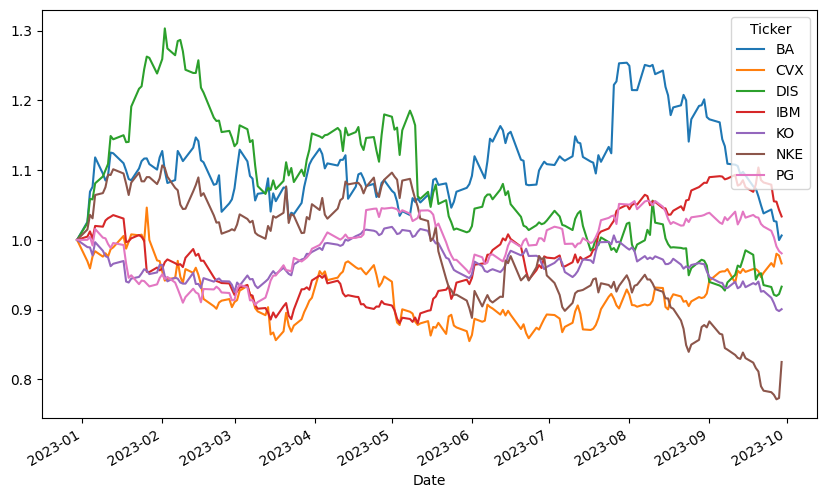

In [28]:
CRo.plot(figsize=(10, 6))

### Portfolio OPtimization 

- estimate input

In [32]:
Ri

Ticker,BA,CVX,DIS,IBM,KO,NKE,PG
Date,,,,,,,
2018-01-31,0.201621,0.001278,0.010790,0.067006,0.037271,0.090648,-0.053132
2018-02-28,0.027169,-0.098252,-0.050704,-0.038703,-0.091826,-0.017444,-0.090572
2018-03-31,-0.094779,0.018942,-0.026367,-0.015402,0.013729,-0.005804,0.009679
2018-04-30,0.017323,0.097071,-0.001095,-0.055204,-0.005066,0.029350,-0.079094
2018-05-31,0.061029,0.002190,-0.008572,-0.014358,-0.004860,0.049861,0.011474
2018-06-30,-0.047280,0.017136,0.053685,-0.011393,0.029084,0.112849,0.066831
2018-07-31,0.061965,-0.001266,0.092194,0.037437,0.063156,-0.034764,0.045529
2018-08-31,-0.033164,-0.052857,-0.013561,0.021614,-0.044178,0.071414,0.025594
2018-09-30,0.084921,0.032247,0.043921,0.032291,0.045162,0.030657,0.003375


In [33]:
# monthly mean and cov 

ER, S = Ri.mean(), Ri.cov()

print(ER)
print('--------------------------------------------------------------------------')
print(S)

Ticker
BA     0.002853
CVX    0.014017
DIS    0.001215
IBM    0.006282
KO     0.009694
NKE    0.014857
PG     0.012067
dtype: float64
--------------------------------------------------------------------------
Ticker        BA       CVX       DIS       IBM        KO       NKE        PG
Ticker                                                                      
BA      0.018554  0.006314  0.006001  0.004906  0.003171  0.005570  0.001470
CVX     0.006314  0.009306  0.004647  0.003592  0.002241  0.002943  0.000890
DIS     0.006001  0.004647  0.008759  0.002420  0.002548  0.003545  0.001181
IBM     0.004906  0.003592  0.002420  0.005880  0.001980  0.002462  0.001677
KO      0.003171  0.002241  0.002548  0.001980  0.002925  0.001756  0.001848
NKE     0.005570  0.002943  0.003545  0.002462  0.001756  0.007048  0.001590
PG      0.001470  0.000890  0.001181  0.001677  0.001848  0.001590  0.002638


- define objective func 
    - portfolio variance 
    - portfolio sharpe 

In [34]:
### portolio Variance

def PV(w, S):   # wT * cov * w 
    return (w.T @ S @ w) 


### Negative Portfolio Sharpe Ratio ( NPSR )
def NPSR(w, ER, S):  # wT * ER / (wT * cov * w).sqrt , where ER is a vector 
    return-(w.T @ ER)/ ((w.T @ S @ w) ** 0.5)  # Negative Sharpe Ratio: turn maximization problem into minimization problem

In [35]:
one = np.ones(7)
one

array([1., 1., 1., 1., 1., 1., 1.])

In [37]:
w = np.ones(7) / 7   # total seven stocks ( equal weigted)
w 

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [38]:
# variance 
PV(w, S)

0.003686051785260901

In [39]:
# SR 
NPSR(w, ER, S)

-0.14349685521448582

### Optimization
- setup 

In [41]:
N = len(ER)    # 7 
x0 = np.ones(N)/N # initial guess with w = 1/N 
cons = ({'type': 'eq' ,'fun' : lambda x: np.sum(x)- 1})  # constraints 


In [42]:
N = len(ER)   # ER : average return
N

7

In [43]:
x0 = np.ones(N)/N # initial guess with w = 1/N 
x0

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [19]:
np.sum(x0)

0.9999999999999998

- func 

In [46]:
## setup for minimize func : 

# min target : PV 
# init guess : x0
# method : method
# args : S ( in the PV( w, S) )  --> now we're solving for w, so given: S 
# constraints : cons
    # cons = ({'type': 'eq' ,'fun' : lambda x: np.sum(x)- 1})  # constraints 
        # eq: equality 
        # fun: constrains function 
        
# options = {'ftol': 1e-10 , 'disp': True} 
    # ftol : accuracy 
    # disp : print out solution

In [47]:
# GMVP : global min varaince portfolio ( minimize portfolio variance )
G = minimize(PV, x0, method='SLSQP', args=S, constraints=cons, options={'ftol': 1e-10 , 'disp': True}).x

#  minimize( min_target, init_guess, method, given_cov, constraints).x  
#  .x : solution


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0021318444915660916
            Iterations: 35
            Function evaluations: 280
            Gradient evaluations: 35


In [49]:
G  # ( GMVP weights )

array([-0.05663647,  0.07818226,  0.03584206,  0.07307801,  0.27961033,
        0.08817903,  0.50174478])

In [51]:
PV ( G, S )  # matching the current function value --> min variance 

0.0021318444915660916

In [52]:
# MSRP : max Sharpe Ratio Portfolio

M = minimize(NPSR, x0, method='SLSQP', args=(ER, S), constraints=cons, options={'ftol': 1e-10 , 'disp': True}).x

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.32417834655176214
            Iterations: 18
            Function evaluations: 147
            Gradient evaluations: 18


In [53]:
M  # ( MSRP weights: result  )

array([-0.14751362,  0.38253968, -0.33718004, -0.21260912,  0.26920337,
        0.37206997,  0.67348976])

In [54]:
sr_init = -NPSR(M, ER, S)  # since NPSR is defined as neg SR 
sr_init 

0.32417834655176214

In [55]:
print(M.T @ ER)  # MSRP return ( weighted expected return )
print(ER)

0.01946029157421141
Ticker
BA     0.002853
CVX    0.014017
DIS    0.001215
IBM    0.006282
KO     0.009694
NKE    0.014857
PG     0.012067
dtype: float64


In [56]:
# variance 
PV( M, S )

0.0036035510622073985

In [57]:
std = np.sqrt(PV( M, S))
std 

0.060029584891180106

### Optimize without short selling 

In [58]:
# Recall M : MSRP weights

M

array([-0.14751362,  0.38253968, -0.33718004, -0.21260912,  0.26920337,
        0.37206997,  0.67348976])

In [59]:
M.sum()

1.0

In [60]:
tot_w = np.abs(M).sum()  # absolute value sum 
tot_w


2.3946055544935936

In [61]:
1 / tot_w   # below 0.5 --> against reg.T --> infeasible ( too much short selling )

0.41760531212476787

### Revise the optimization func ( constraints ) : without short selling 

In [63]:
bounds = Bounds(0, 1)  # 0 <= w <= 1 

In [64]:
# Minimizing PV for GMVP
Gn = minimize(PV, x0, method='SLSQP', args=S, constraints=cons, bounds=bounds, options={'ftol': 1e-10 , 'disp': True}).x

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.002166642994887929
            Iterations: 27
            Function evaluations: 216
            Gradient evaluations: 27


In [65]:
Gn

array([0.        , 0.06787501, 0.02487296, 0.05087313, 0.25392865,
       0.06407432, 0.53837592])

In [67]:
# round to 3 decimal places 
np.round(Gn, 3)

array([0.   , 0.068, 0.025, 0.051, 0.254, 0.064, 0.538])

In [68]:
# Also do for MSRP 

Mn = minimize(NPSR, x0, method='SLSQP', args=(ER, S), constraints=cons, bounds=bounds, options={'ftol': 1e-10 , 'disp': True}).x

np.round(Mn, 6)  # round to 6 decimal places Mn

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.26577609431640087
            Iterations: 10
            Function evaluations: 80
            Gradient evaluations: 10


array([0.      , 0.156712, 0.      , 0.      , 0.      , 0.164333,
       0.678955])

In [69]:
M  # compare to this 

array([-0.14751362,  0.38253968, -0.33718004, -0.21260912,  0.26920337,
        0.37206997,  0.67348976])

In [70]:
1 / np.abs(Mn).sum()    # without short selling, adding the constraint weights add up to 1, this will be the result 

0.9999999999999998

In [73]:
1 / np.abs(M).sum()  # with short selling

0.41760531212476787

### Cal Y* 

In [75]:
M  #  with short selling 

array([-0.14751362,  0.38253968, -0.33718004, -0.21260912,  0.26920337,
        0.37206997,  0.67348976])

In [80]:
# Y* : 0.54 to MSRP, 0.46 to rf 

ER_MSRP  = M.T @ ER
VAR_MSRP = PV(M, S)

rf = 0 
A  = 10 


ystar =  (ER_MSRP - rf) / (A * VAR_MSRP)   # ystar : ER - rf / A * sigma^2 
ystar   # y* : result that is allocated to MSRP 

0.5400309649640644

In [81]:
ER_ystar =  ystar * ER_MSRP + (1-ystar) * rf  # E[r] = y E[rp] + (1-y) rf

SD_ystar = ystar * VAR_MSRP ** 0.5  # std of y : y * std of rp , here rp : return of MSRP ( risky asset)

SR_ystar = (ER_ystar - rf) / SD_ystar  

In [82]:
ER_ystar, SD_ystar, SR_ystar

(0.01050916003730344, 0.03241783465517622, 0.32417834655176214)

In [83]:
## Compare SR_ystar with SR_GMVP

sr_init == SR_ystar     

# meaning : sr_init : Sharpe of MSRP ( a point ) --> This EF is cal based on trade off between only risky asets 
# SR_ystar : new CAL ( choose between MSRP and risk free asset )
# they intersect in only a point 

True

### Expected utility 

In [84]:
# E[U] = E[r] - 0.5 * A * std^2

EUA = ER_ystar - 0.5 * A * SD_ystar ** 2 
EUA 

0.005254580018651719

In [85]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [87]:

# Use the correct style name
plt.style.use('seaborn-v0_8-dark')

# Create the DataFrame
P = pd.DataFrame(index=Ri.columns)  # set index to tickers 
P['G'], P['M'], P['Gn'], P['Mn'], P['EW'] = G, M, Gn, Mn, 1 / N


In [89]:
G # GMVP weights 

array([-0.05663647,  0.07818226,  0.03584206,  0.07307801,  0.27961033,
        0.08817903,  0.50174478])

In [92]:
M # MSRP weights

array([-0.14751362,  0.38253968, -0.33718004, -0.21260912,  0.26920337,
        0.37206997,  0.67348976])

In [93]:
P  # weights for diff portfolios    
# EW : equal weight 

,G,M,Gn,Mn,EW
Ticker,,,,,
BA,-0.056636,-0.147514,0.000000,0.000000e+00,0.142857
CVX,0.078182,0.382540,0.067875,1.567120e-01,0.142857
DIS,0.035842,-0.337180,0.024873,0.000000e+00,0.142857
IBM,0.073078,-0.212609,0.050873,0.000000e+00,0.142857
KO,0.279610,0.269203,0.253929,3.119491e-16,0.142857
NKE,0.088179,0.372070,0.064074,1.643328e-01,0.142857
PG,0.501745,0.673490,0.538376,6.789551e-01,0.142857


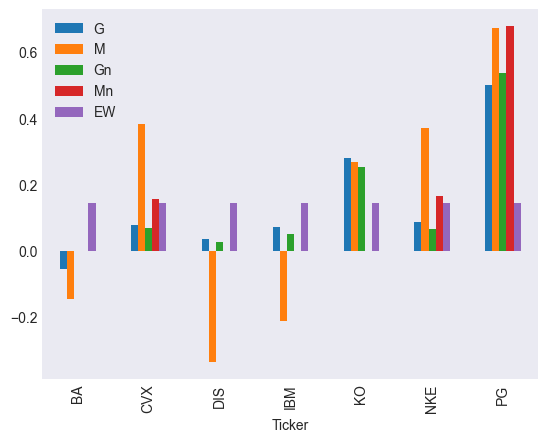

In [94]:
fig2a = P.plot(kind='bar')

In [98]:
test_perf = CRo @ P 
test_perf.tail()

,G,M,Gn,Mn,EW
Date,,,,,
2023-09-25,0.962322,0.891953,0.971980,0.967670,0.961914
2023-09-26,0.953746,0.891707,0.963129,0.960127,0.950928
2023-09-27,0.945292,0.885755,0.954369,0.952935,0.948966
2023-09-28,0.941982,0.885802,0.949589,0.948264,0.942507
2023-09-29,0.944121,0.896741,0.950875,0.952796,0.949310


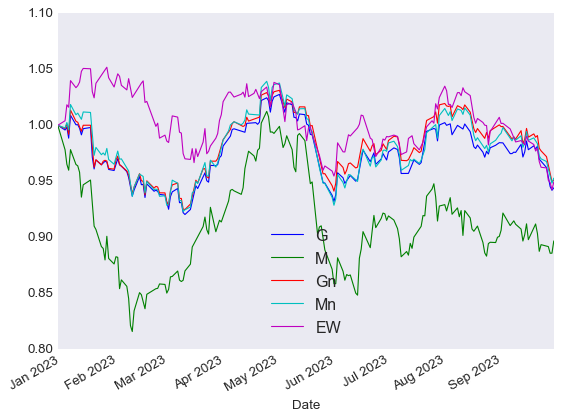

In [141]:
# test out of sample performance CRo

fig2b = (CRo @ P).plot()

In [99]:
# GMVP : expected return and std 
ER_G = G.T @ ER     

SD_G = PV(G, S) ** 0.5

# MSRP : expected return and std
ER_M = M.T @ ER

SD_M = PV(M, S) ** 0.5

In [101]:
ER_G

0.011512012531093595

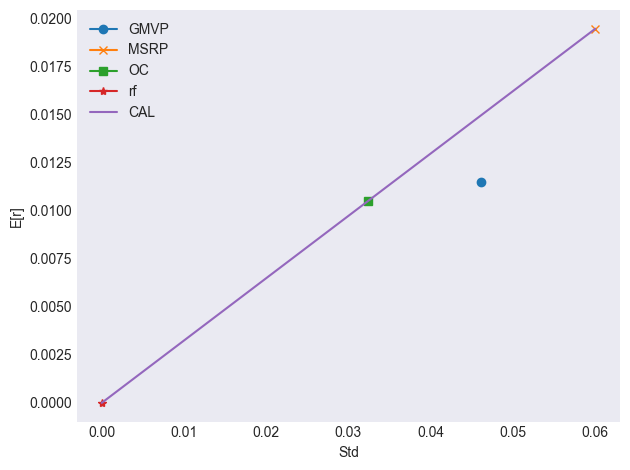

In [107]:
# plotting Mean variance plot 


plt.plot(SD_G, ER_G, marker='o', label='GMVP')
plt.plot(SD_M, ER_M, marker='x', label='MSRP')
plt.plot(SD_ystar, ER_ystar, marker='s', label='OC')  # Optimal Complete Portfolio # OC --> point ( allocate between MSRP and risk free asset )
plt.plot(0, 0, marker='*', label='rf')  
plt.plot([0, SD_M], [0, ER_M], label = 'CAL') # new EF : will go through risk free, and MSRP( only allocating to risky asset)

plt.xlabel('Std')
plt.ylabel('E[r]')

plt.legend()
plt.tight_layout()
